In [16]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import cmath
import scipy
from scipy.fftpack import fft, ifft, fftfreq, rfft
import scipy.signal
from scipy.integrate import quad

FFT sono gli algoritmi per l'implementazione del DFT in modo efficiente. In pratica la formula per la trasformazione dei segnali resta questa.
$$
\text{DFT}: \qquad X(\frac{2\pi k}{N}) =\sum_{n=0}^{N-1} x(n) e^{-j \frac{2 \pi k n}{N}}, \quad k=0,1,2, \ldots, N-1 \\
\text{IDFT}: \qquad x(n) = \frac{1}{N} \sum_{n=0}^{N-1} X(k) e^{j \frac{2 \pi k n}{N}}, \quad n=0,1,2, \ldots, N-1
$$

https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft

# Esempio 1 
$$
x(n)=a^{n} u(n), \quad-1<a<1
$$

### Caso in cui $f_s$ = 1 $\rightarrow$ la frequenza in cicli per unità di tempo coincide con la frequenza in Hz

In [17]:
def fn(n, a):
    assert abs(a) <= 1
    if n>=0:
        out = a**n
    else:
        out = 0
    return out
def calc_x_n(n, a):
    return [fn(i, a) for i in n] #np.array([fn(i, a) for i in n]) #np.vectorize(fn)(n, a)
def fourier_transform(w, a):
    return 1/(1 - a*(np.cos(w) - 1j*np.sin(w)))
def calc_fourier_transform(w,a):
    return np.vectorize(fourier_transform)(w, a)

No handles with labels found to put in legend.


Frequenza = 0.33 cicli/unità_tempo 


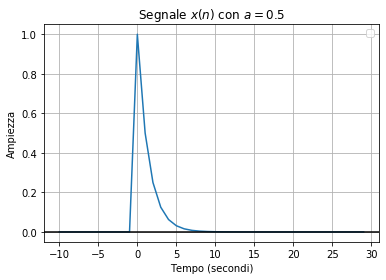

In [18]:
fs = 1
n = np.arange(-10, 30, 1/fs)
f = 1/3
f_hz = f/n[1]
print('Frequenza = {} cicli/unità_tempo '.format(np.round(f, 2)))
a = 0.5
x_n = calc_x_n(n, a)
plt.plot(n, x_n)
plt.title('Segnale $x(n)$ con $a = {}$'.format(a))
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

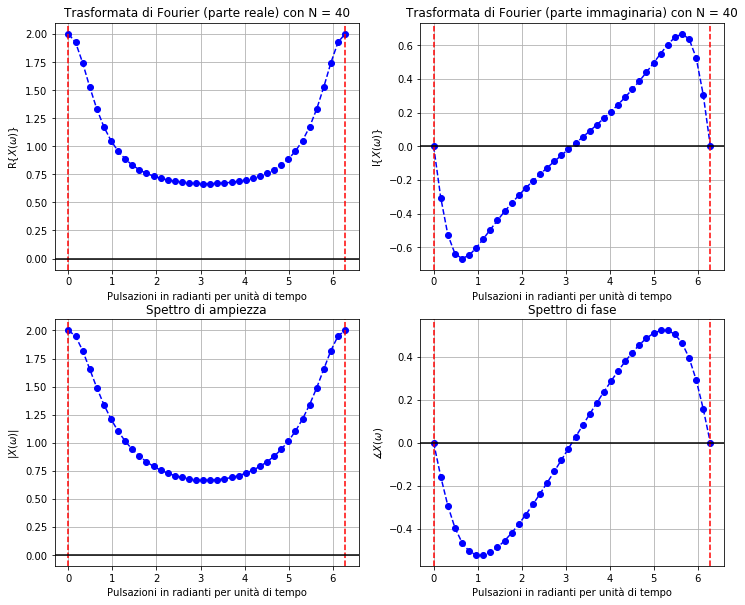

In [19]:
N = len(x_n)
ws = np.linspace(0, 2*np.pi, N)
ft = calc_fourier_transform(ws, a)
fig, axs = plt.subplots(2,2, figsize=(12, 10))
#if 
axs[0, 0].plot(ws, ft.real, '--bo', color = 'b')
axs[0, 0].axvline(x=0, color='r', ls='--')
axs[0, 0].axvline(x=2*np.pi, color='r', ls='--')
axs[0, 0].set_title('Trasformata di Fourier (parte reale) con N = {}'.format(N))
axs[0, 0].set_xlabel('Pulsazioni in radianti per unità di tempo')
axs[0, 0].set_ylabel('R{$X(\omega)$}')
axs[0, 0].grid(True, which='both')
axs[0, 0].axhline(y=0, color='k')

axs[0, 1].plot(ws, ft.imag, '--bo', color = 'b')
axs[0, 1].axvline(x=0, color='r', ls='--')
axs[0, 1].axvline(x=2*np.pi, color='r', ls='--')
axs[0, 1].set_title('Trasformata di Fourier (parte immaginaria) con N = {}'.format(N))
axs[0, 1].set_xlabel('Pulsazioni in radianti per unità di tempo')
axs[0, 1].set_ylabel('I{$X(\omega)$}')
axs[0, 1].grid(True, which='both')
axs[0, 1].axhline(y=0, color='k')

axs[1, 0].plot(ws, [abs(i) for i in ft], '--bo')
axs[1, 0].axvline(x=0, color='r', ls='--')
axs[1, 0].axvline(x=2*np.pi, color='r', ls='--')
axs[1, 0].set_title('Spettro di ampiezza')
axs[1, 0].set_xlabel('Pulsazioni in radianti per unità di tempo')
axs[1, 0].set_ylabel('|$X(\omega)$|')
axs[1, 0].grid(True, which='both')
axs[1, 0].axhline(y=0, color='k')

axs[1, 1].plot(ws, [cmath.phase(i) for i in ft], '--bo')
axs[1, 1].axvline(x=0, color='r', ls='--')
axs[1, 1].axvline(x=2*np.pi, color='r', ls='--')
axs[1, 1].set_title('Spettro di fase')
axs[1, 1].set_xlabel('Pulsazioni in radianti per unità di tempo')
axs[1, 1].set_ylabel('$\measuredangle X(\omega)$')
axs[1, 1].grid(True, which='both')
axs[1, 1].axhline(y=0, color='k')
    
plt.show()

Le formule calc_dft e calc_dft2 sono scritte da me e permettono di effettuare il DFT di ogni segnale, ma nel modo tradizionale. Questo implica una scarsa efficenza nei calcoli, l'fft di scipy fornisce gli stessi risultati ma in minor tempo. 

In [20]:
def calc_dft(x_n):
    N = len(x_n)
    ks = np.arange(N)
    ws = ks*2*np.pi/N
    X_wk = []
    for w in ws:
        values = []
        for n in range(N):
            x = x_n[n]
            values.append(x*(np.cos(w*n) - 1j*np.sin(w*n)))
        X_wk.append(np.sum(values))
    X_w = np.array(X_wk)
    return X_w

def dft(x_n, n, w):
    return x_n*(np.cos(w*n) - 1j*np.sin(w*n))
def calc_dft2(x_n):
    N = len(x_n)
    Ns = np.arange(N)
    ks = np.arange(N)
    ws = ks*2*np.pi/N
    values = []
    for w in ws:
        values.append(np.sum(np.vectorize(dft)(x_n, Ns, w)))
    return np.array(values)

In [21]:
v = calc_dft(x_n)
v2 = calc_dft2(x_n)
ks = np.arange(N)
ws = ks*2*np.pi/N
v3 = calc_fourier_transform(ws, a)
v4 = fft(x_n)

In [25]:
def plots(version3 = True):
    freqs = np.sort(fftfreq(len(x_n), 1.0/fs))
        
    plt.figure(figsize=(7,5))
    plt.plot(freqs, v.real, label = 'my_version1', lw = 4)
    plt.plot(freqs, v2.real, label = 'my_version2')
    if version3:
        plt.plot(freqs, v3.real,  label = 'my_version3', ls='-.')
    plt.plot(freqs, v4.real,  label = 'fft', ls='--', color = 'C03')
    plt.axvline(x=-0.5*fs, color='r', ls='--')
    plt.axvline(x=0.5*fs, color='r', ls='--')
    plt.title('Trasformata di Fourier (parte reale) con N = {}'.format(N))
    plt.xlabel('Frequenze in Hz')
    plt.ylabel('R{$X(\omega)$}')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,5))
    plt.plot(freqs, v.imag, label = 'my_version1', lw = 4)
    plt.plot(freqs, v2.imag, label = 'my_version2')
    if version3:
        plt.plot(freqs, v3.imag, label = 'my_version3', ls='-.')
    plt.plot(freqs, v4.imag,  label = 'fft', ls='--', color = 'C03')
    plt.axvline(x=-0.5*fs, color='r', ls='--')
    plt.axvline(x=0.5*fs, color='r', ls='--')
    plt.title('Trasformata di Fourier (parte immaginaria) con N = {}'.format(N))
    plt.xlabel('Frequenze in Hz')
    plt.ylabel('I{$X(\omega)$}')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,5))
    plt.plot(freqs, v, label = 'my_version1', lw = 4)
    plt.plot(freqs, v2, label = 'my_version2')
    if version3:
        plt.plot(freqs, v3, label = 'my_version3', ls='-.')
    plt.plot(freqs, v4,  label = 'fft', ls='--', color = 'C03')
    plt.axvline(x=-0.5*fs, color='r', ls='--')
    plt.axvline(x=0.5*fs, color='r', ls='--')
    plt.title('Spettro di ampiezza'.format(N))
    plt.xlabel('Frequenze in Hz')
    plt.ylabel('|$X(\omega)$|')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend()
    plt.show()

    plt.figure(figsize=(7,5))
    freqs = np.sort(fftfreq(len(x_n), 1.0/fs))
    plt.plot(freqs, np.angle(v), label = 'my_version1', lw = 4)
    plt.plot(freqs, np.angle(v2), label = 'my_version2')
    if version3:
        plt.plot(freqs, np.angle(v3),  label = 'my_version3', ls='-.')
    plt.plot(freqs, np.angle(v4),  label = 'fft', ls='--', color = 'C03')
    plt.axvline(x=-0.5*fs, color='r', ls='--')
    plt.axvline(x=0.5*fs, color='r', ls='--')
    plt.title('Spettro di fase'.format(N))
    plt.xlabel('Frequenze in Hz')
    plt.ylabel('$\measuredangle X(\omega)$')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend()
    plt.show()

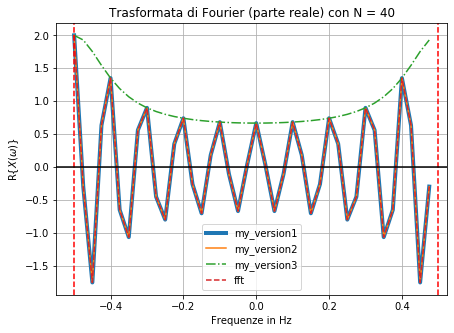

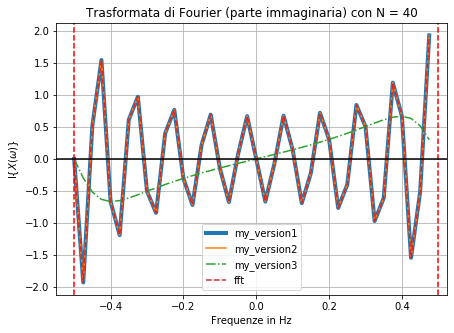

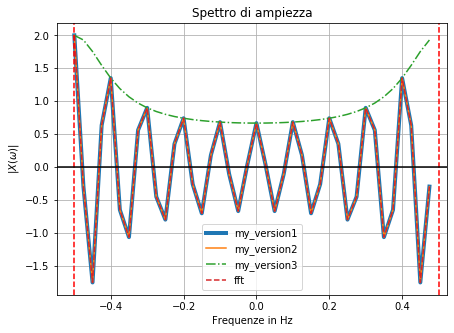

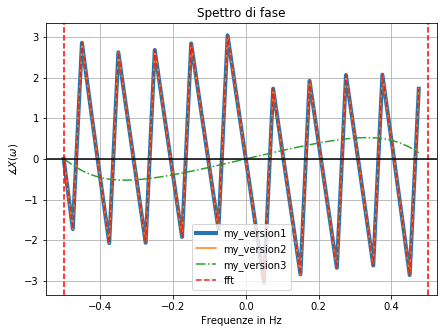

In [26]:
plots()

In [27]:
x1 = ifft(v)
x2 = ifft(v2)
x3 = ifft(v3)
x4 = ifft(v4)

In [28]:
def plot_rec(version3 = True):
    plt.plot(n, x1,label = 'my_version1', lw = 4)
    plt.title('Segnale x(n) ricostruito')
    plt.xlabel('Tempo (secondi)')
    plt.ylabel('Ampiezza')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend()
    plt.show()

    plt.plot(n, x2,label = 'my_version2', color = 'C1')
    plt.title('Segnale x(n) ricostruito')
    plt.xlabel('Tempo (secondi)')
    plt.ylabel('Ampiezza')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend()
    plt.show()
    
    if version3:
        plt.plot(n, x3,label = 'my_version3', color = 'C2', ls='-.')
        plt.title('Segnale x(n) ricostruito')
        plt.xlabel('Tempo (secondi)')
        plt.ylabel('Ampiezza')
        plt.grid(True, which='both')
        plt.axhline(y=0, color='k')
        plt.legend()
        plt.show()

    plt.plot(n, x4, label = 'fft', color = 'C13', ls='--')
    plt.title('Segnale x(n) ricostruito')
    plt.xlabel('Tempo (secondi)')
    plt.ylabel('Ampiezza')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend()
    plt.show()

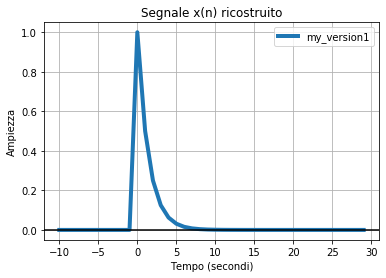

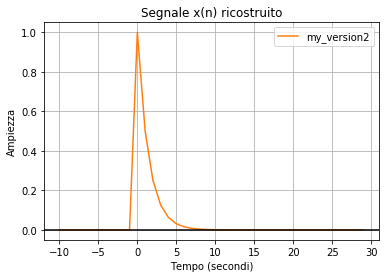

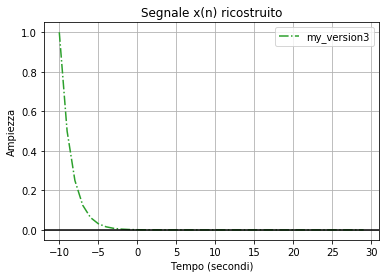

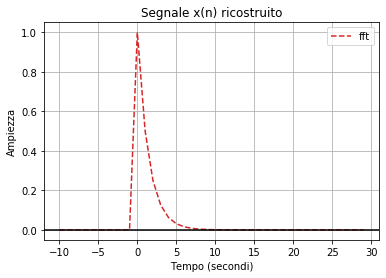

In [29]:
plot_rec()

### Caso in cui $f_s$ = 3 $\rightarrow$ la frequenza in cicli per unità di tempo non coincide con la frequenza in Hz

No handles with labels found to put in legend.


Frequenza = 0.33 cicli/unità_tempo 


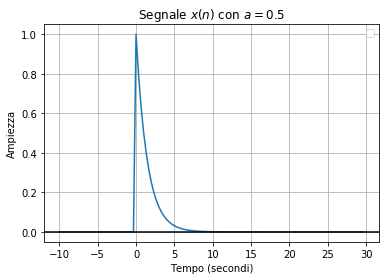

In [30]:
fs = 3
n = np.arange(-10, 30, 1/fs)
f = 1/3
f_hz = f/n[1]
print('Frequenza = {} cicli/unità_tempo '.format(np.round(f, 2)))
a = 0.5
x_n = calc_x_n(n, a)
plt.plot(n, x_n)
plt.title('Segnale $x(n)$ con $a = {}$'.format(a))
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

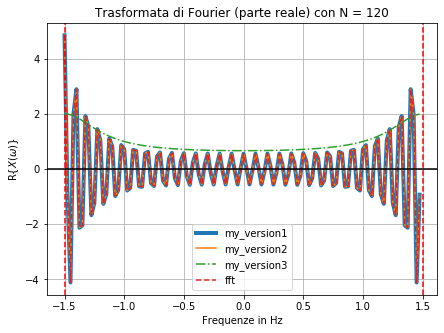

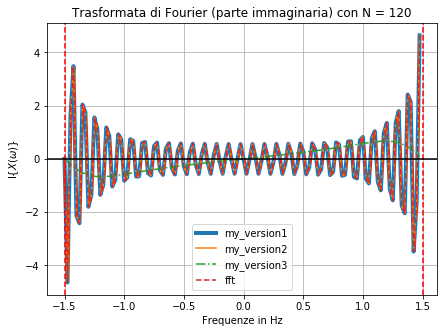

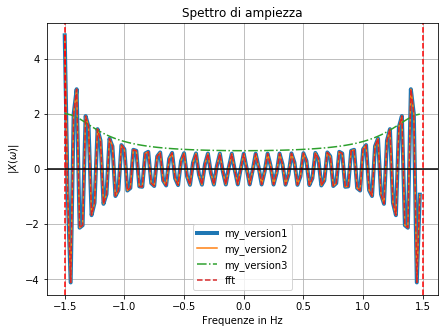

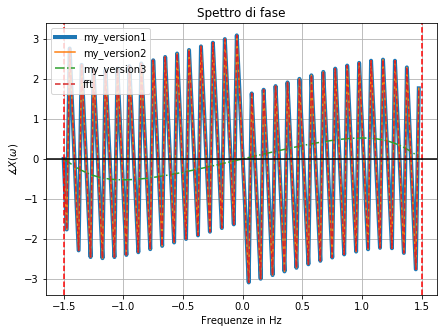

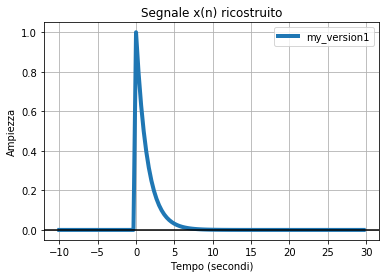

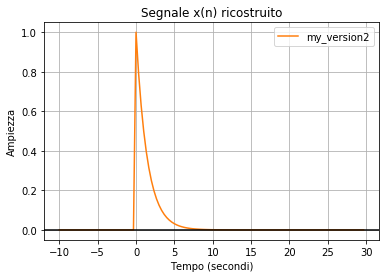

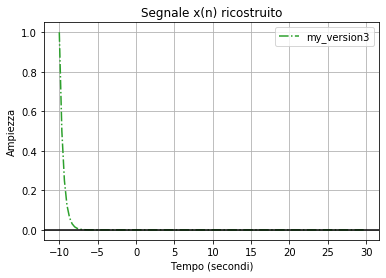

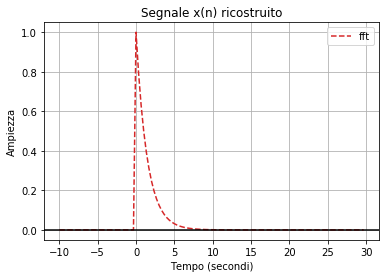

In [31]:
N = len(x_n)
v = calc_dft(x_n)
v2 = calc_dft2(x_n)
ks = np.arange(N)
ws = ks*2*np.pi/N
v3 = calc_fourier_transform(ws, a)
v4 = fft(x_n)
plots()
x1 = ifft(v)
x2 = ifft(v2)
x3 = ifft(v3)
x4 = ifft(v4)
plot_rec()

# Esempio 2 
$$
x(n)=\begin{cases} A \quad \mbox{ se } \mbox{ n} \in [0+mN, L-1+mN] \\ 0 \quad \mbox{ altrimenti} \end{cases} \quad \text{con }m \in \mathbb{Z}
$$

No handles with labels found to put in legend.


k: 1 	 result: (0.11-0.63j)
k: 2 	 result: (0.11+0.04j)
k: 3 	 result: (0.11-0.19j)
k: 4 	 result: (0.11+0.09j)
k: 5 	 result: (0.11-0.09j)
k: 6 	 result: (0.11+0.19j)
k: 7 	 result: (0.11-0.04j)
k: 8 	 result: (0.11+0.63j)


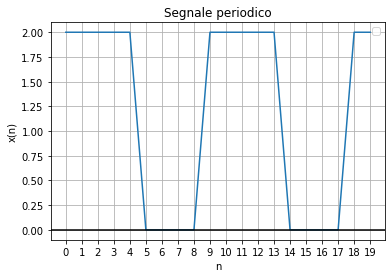

In [34]:
def f(n, N, A, L):
    m1 = int(n/N)
    m2 = int((n + 1)/N)
    m3 = int((n - 1)/N)
    l1 = np.arange(m1*N,L-1 + m1*N + 1)
    l2 = np.arange(m2*N,L-1 + m2*N + 1)
    l3 = np.arange(m3*N,L-1 + m3*N + 1)
    if n in l1:
        out = A
    elif n in l2:
        out = A
    elif n in l3:
        out = A
    else:
        out = 0
    return out
def calc_x_n(n, N, A, L):
    return np.vectorize(f)(n, N, A, L)
A = 2
N = 9
L = 5
c_k = []
c_0 = A*L/N
c_k.append(c_0)
for k in range(1, N):
    res = (A/N)*(np.cos(k*np.pi*(L-1)/N) - 1j*np.sin(k*np.pi*(L-1)/N))*((np.sin(np.pi*k*L/N))/(np.sin(np.pi*k/N)))
    c_k.append(res)
    print('k: {} \t result: {}'.format(k, np.round(res, 2)))
n = np.arange(0.0, 20).astype(int)
x_n = calc_x_n(n, N, A, L)
plt.plot(n, x_n)
plt.title('Segnale periodico')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.xticks(n)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

$$
c_{k}=\left\{\begin{array}{ll}
\frac{A L}{N}, & k=0,+N, \pm 2 N, \ldots \\
\frac{A}{N} e^{- \frac{j \pi k(L-1)}{N}} \frac{\sin (\frac{\pi k L}{ N})}{\sin (\frac{\pi k}{N})}, & \text { altrimenti }
\end{array}\right.
$$

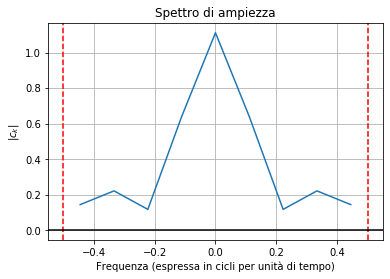

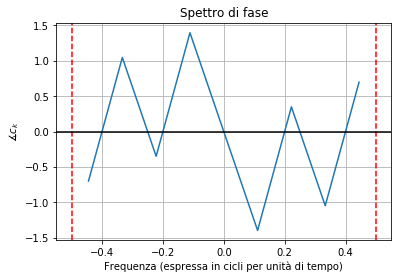

In [35]:
f_m4 = -4/N
f_m3 = -3/N
f_m2 = -2/N
f_m1 = -1/N
freqs = [f_m4, f_m3,f_m2,f_m1]
for i in range(int((N-1)/2)+1):
    freqs.append(i/N)
c_km4 = c_k[-4]
c_km3 = c_k[-3]
c_km2 = c_k[-2]
c_km1 = c_k[-1]
c_k_ = [c_km4, c_km3, c_km2, c_km1]
for i in range(int((N-1)/2)+1):
    c_k_.append(c_k[i])
    
plt.plot(freqs, [abs(i) for i in c_k_])
plt.axvline(x=-0.5, color='r', ls='--')
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Spettro di ampiezza')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$|c_k|$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

plt.plot(freqs, [cmath.phase(i) for i in c_k_])
plt.axvline(x=-0.5, color='r', ls='--')
plt.axvline(x=0.5, color='r', ls='--')
plt.title('Spettro di fase')
plt.xlabel('Frequenza (espressa in cicli per unità di tempo)')
plt.ylabel('$\measuredangle c_k$')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

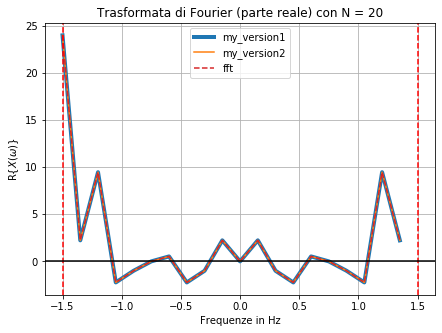

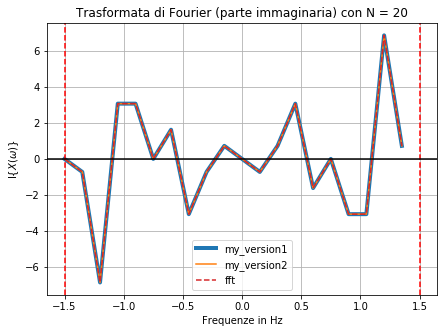

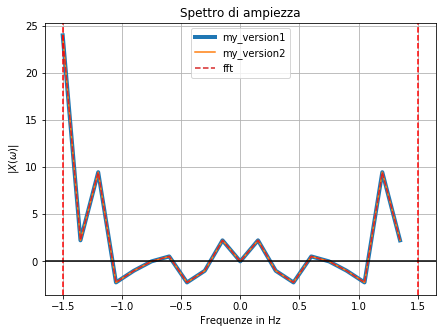

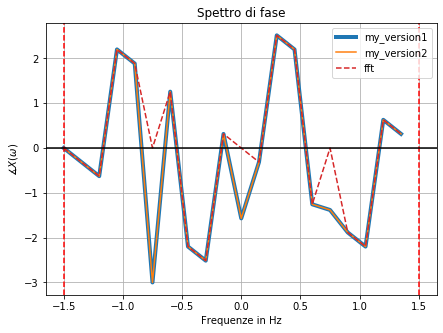

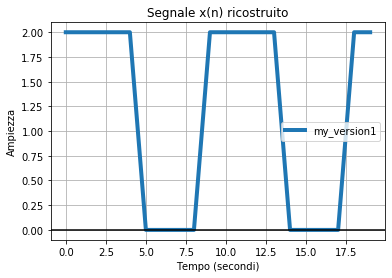

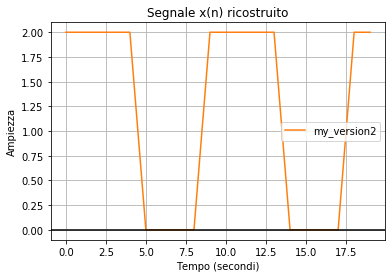

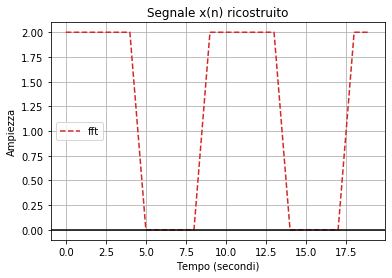

In [36]:
N = len(x_n)
v = calc_dft(x_n)
v2 = calc_dft2(x_n)
ks = np.arange(N)
ws = ks*2*np.pi/N
v3 = np.zeros(N)
v4 = fft(x_n)
plots(version3 = False)
x1 = ifft(v)
x2 = ifft(v2)
x3 = ifft(v3)
x4 = ifft(v4)
plot_rec(version3 = False)